In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np


In [2]:
# Cargar el archivo CSV
file_path = 'houseprices.csv'  # Cambiar si es necesario
house_data = pd.read_csv(file_path)

# Ver las primeras filas del archivo
house_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Seleccionar las columnas relevantes
columns_needed = ['LotArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'SalePrice']
selected_data = house_data[columns_needed].dropna()  # Eliminar filas con valores nulos

# Verificar las dimensiones de los datos seleccionados
selected_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   FullBath      1460 non-null   int64
 2   HalfBath      1460 non-null   int64
 3   BedroomAbvGr  1460 non-null   int64
 4   SalePrice     1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


In [4]:
# Definir las variables independientes (X) y dependiente (y)
X = selected_data[['LotArea', 'FullBath', 'HalfBath', 'BedroomAbvGr']]
y = selected_data['SalePrice']

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Extraer los coeficientes y la intersección
coefficients = model.coef_
intercept = model.intercept_


In [5]:
# Mostrar los coeficientes y la intersección
print("Coeficientes:")
print(f"α (LotArea): {coefficients[0]:.2f}")
print(f"β (FullBath): {coefficients[1]:.2f}")
print(f"γ (HalfBath): {coefficients[2]:.2f}")
print(f"δ (BedroomAbvGr): {coefficients[3]:.2f}")
print(f"Intersección (p_0): {intercept:.2f}")

# Modelo ajustado
print("\nModelo ajustado:")
print(f"p = {coefficients[0]:.2f} * LotArea + {coefficients[1]:.2f} * FullBath + "
      f"{coefficients[2]:.2f} * HalfBath + {coefficients[3]:.2f} * BedroomAbvGr + {intercept:.2f}")


Coeficientes:
α (LotArea): 1.63
β (FullBath): 78101.14
γ (HalfBath): 36527.12
δ (BedroomAbvGr): -10270.13
Intersección (p_0): 56988.93

Modelo ajustado:
p = 1.63 * LotArea + 78101.14 * FullBath + 36527.12 * HalfBath + -10270.13 * BedroomAbvGr + 56988.93


In [6]:
# Hacer una predicción para datos nuevos (ejemplo)
example = pd.DataFrame({'LotArea': [8000], 'FullBath': [2], 'HalfBath': [1], 'BedroomAbvGr': [3]})
prediction = model.predict(example)
print(f"Predicción para el ejemplo dado: {prediction[0]:.2f}")


Predicción para el ejemplo dado: 231955.18


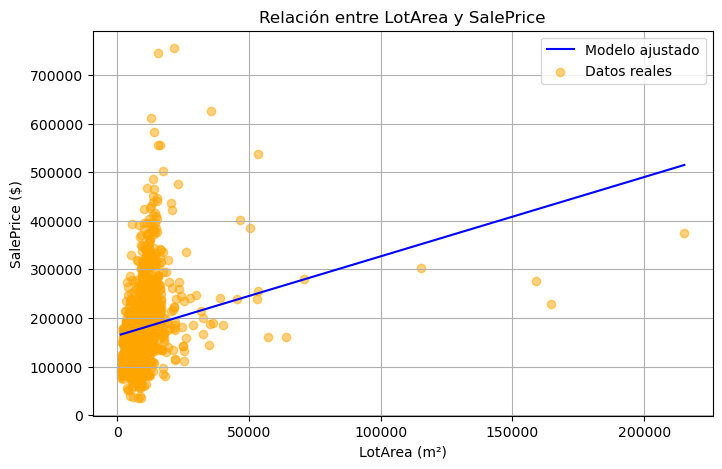

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Generar valores para LotArea
lot_area_range = np.linspace(X['LotArea'].min(), X['LotArea'].max(), 100)

# Mantener valores constantes para las demás variables
full_bath_constant = X['FullBath'].mean()
half_bath_constant = X['HalfBath'].mean()
bedroom_constant = X['BedroomAbvGr'].mean()

# Predecir los precios para LotArea
predicted_prices = (
    coefficients[0] * lot_area_range +
    coefficients[1] * full_bath_constant +
    coefficients[2] * half_bath_constant +
    coefficients[3] * bedroom_constant +
    intercept
)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(lot_area_range, predicted_prices, label='Modelo ajustado', color='blue')
plt.scatter(X['LotArea'], y, alpha=0.5, label='Datos reales', color='orange')
plt.title('Relación entre LotArea y SalePrice')
plt.xlabel('LotArea (m²)')
plt.ylabel('SalePrice ($)')
plt.legend()
plt.grid(True)
plt.show()


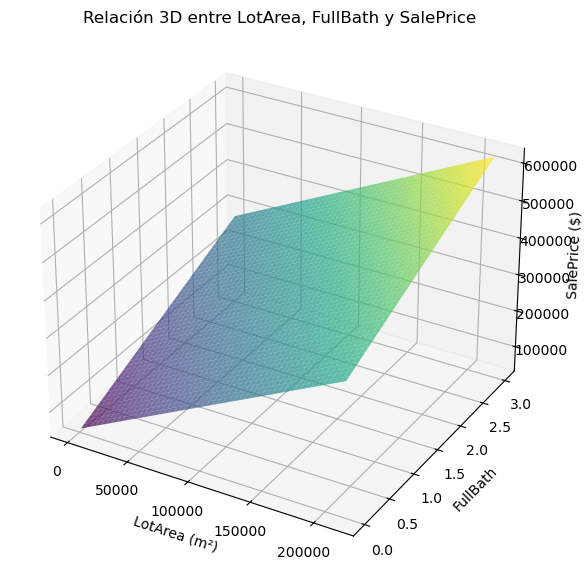

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Crear una malla para LotArea y FullBath
lot_area_range = np.linspace(X['LotArea'].min(), X['LotArea'].max(), 50)
full_bath_range = np.linspace(X['FullBath'].min(), X['FullBath'].max(), 50)
lot_area_mesh, full_bath_mesh = np.meshgrid(lot_area_range, full_bath_range)

# Mantener constantes las demás variables
half_bath_constant = X['HalfBath'].mean()
bedroom_constant = X['BedroomAbvGr'].mean()

# Calcular los precios
predicted_prices_3d = (
    coefficients[0] * lot_area_mesh +
    coefficients[1] * full_bath_mesh +
    coefficients[2] * half_bath_constant +
    coefficients[3] * bedroom_constant +
    intercept
)

# Graficar en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(lot_area_mesh, full_bath_mesh, predicted_prices_3d, alpha=0.7, cmap='viridis')

# Etiquetas
ax.set_title('Relación 3D entre LotArea, FullBath y SalePrice')
ax.set_xlabel('LotArea (m²)')
ax.set_ylabel('FullBath')
ax.set_zlabel('SalePrice ($)')
plt.show()
